# Stochastic Gradient Decent

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[ 7.   9.  13.  17.5 18. ]


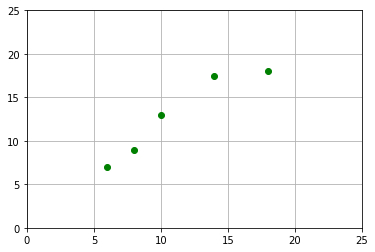

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [6,8,10,14,18]
X = np.array(X).reshape(-1,1)
Y = [7,9,13,17.5,18]
Y = np.array(Y)

print(X)
print(Y)

plt.figure()
plt.plot(X,Y,'go')
plt.axis([0,25,0,25])
plt.grid(True)

SGD Method ->  1.8017490430548424


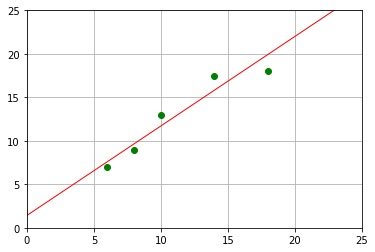

In [2]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss="squared_loss", max_iter = 1000)
model.fit(X,Y)

#Plot initial data
plt.figure()
plt.plot(X,Y,'go')
plt.axis([0,25,0,25])
plt.grid()

#plot Regression Solution line
plt.plot([0,25],[model.predict(0),model.predict(25)],color='r',ls='-',lw=1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,model.predict(X),multioutput="uniform_average")
print("SGD Method -> ",mse)

In [3]:
model.predict(15)

array([16.85101443])

In [4]:
model.score(X,Y)

0.9073174360568496

# Polynomial Regression / Non linear (OLS)

**degree**
<pre>
y = mx + c                         linear polynomial with degree 1
y = c + ax + b(x^2)                non linear, degree = 2
y = c + ax + b(x^2) + c(x^3)       non linear, degree = 3
</pre>

### Modelling it as Polynomial

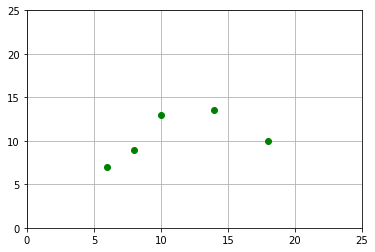

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

X = [6,8,10,14,18]
X = [[each] for each in X]
Y = [7,9,13,13.5,10]
Y = [[each] for each in Y]

plt.figure()
plt.plot(X,Y,'go')
plt.axis([0,25,0,25])
plt.grid()

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
QuadraticCoeff = poly.fit_transform(X)
QuadraticCoeff

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  14., 196.],
       [  1.,  18., 324.]])

In [7]:
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(QuadraticCoeff,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

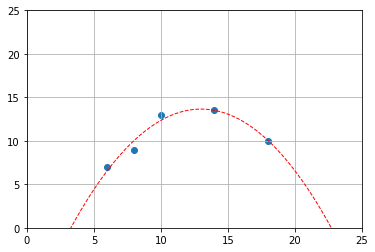

In [8]:
#plotting the curve
xx = np.linspace(0,25,101)
xx_quadratic = poly.transform(xx.reshape(-1,1))
#print(xx_quadratic )
plt.axis([0,25,0,25])
plt.grid()
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),c='r',ls='--',lw=1)
#print(regressor_quadratic.predict(xx_quadratic))
plt.scatter(X,Y)
plt.show()

In [9]:
#degrree2 = 0.9437899786780383
#degree3 = 0.949107142857143
#degree10 = 1
regressor_quadratic.score(QuadraticCoeff,Y)

0.9437899786780383